# Multiple Linear Regression

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Reading and understanding the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
389,390,25-01-2019,1,1,1,0,5,1,1,12.060847,14.74105,64.3750,10.791757,467,3803,4270
431,432,08-03-2019,1,1,3,0,5,1,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
81,82,23-03-2018,2,0,3,0,5,1,2,14.225237,16.89695,83.9565,15.695487,203,1918,2121
558,559,13-07-2019,3,1,7,0,6,0,2,29.998347,33.39665,48.5833,5.416950,1511,5988,7499
658,659,21-10-2019,4,1,10,0,1,1,1,19.030847,22.82145,51.0000,11.125618,2132,4692,6824


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.drop(columns=["instant","dteday","registered","casual"] ,axis =1 ,inplace = True)

In [6]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bikes.shape

(730, 12)

In [8]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
bikes.duplicated().sum()

0

In [11]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

3    188
2    184
1    180
4    178
Name: season, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


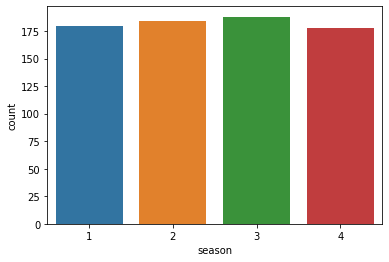

In [12]:
sns.countplot(bikes.season)

print(bikes.season.value_counts())

### Now, let's label the categorical variables like season, weekday,month and weather

#### Season

In [13]:
#Creating a function for the season
def season(x):
    if x == 1:
        return "spring"
    elif x== 2:
        return "summer"
    elif x == 3:
        return "fall"
    else:
        return "winter"

In [14]:
bikes["season"] = bikes["season"].apply(season)

In [15]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


#### For Weekday

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


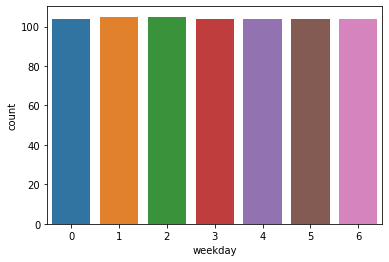

In [16]:
print(bikes.weekday.value_counts())

sns.countplot(bikes.weekday)
plt.show()

In [17]:
def weekday(x):
    if x ==0:
        return "sunday"
    elif x == 1:
        return "monday"
    elif x == 2:
        return "tuesday"
    elif x == 3:
        return "wednesday"
    elif x == 4:
        return "thursday"
    elif x == 5:
        return "friday"
    else :
        return "saturday"

In [18]:
bikes["weekday"] =bikes["weekday"].apply(weekday)

In [19]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,friday,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,saturday,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,sunday,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,monday,1,1,10.489153,11.58500,48.3333,23.500518,1796


#### For Month

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


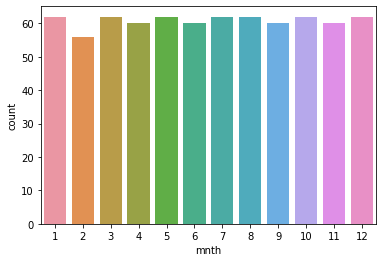

In [20]:
print(bikes.mnth.value_counts())

sns.countplot(bikes.mnth)
plt.show()

In [21]:
def month(x):
    if x ==1:
        return "january"
    elif x == 2:
        return "february"
    elif x == 3:
        return "march"
    elif x == 4:
        return "april"
    elif x == 5:
        return "may"
    elif x == 6:
        return "jun"
    elif x == 7:
        return "july"
    elif x == 8:
        return "august"
    elif x == 9:
        return "september"
    elif x == 10:
        return "octomber"
    elif x == 11:
        return "november"
    
    else :
        return "december"

In [22]:
bikes["mnth"] = bikes["mnth"].apply(month)

In [23]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,december,0,friday,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,december,0,saturday,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,december,0,sunday,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,december,0,monday,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [24]:
##

0    365
1    365
Name: yr, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


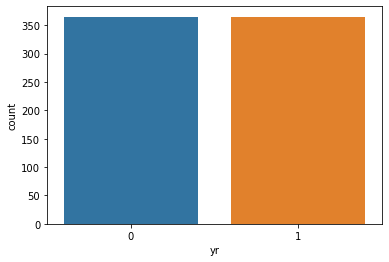

In [25]:
print(bikes.yr.value_counts())

sns.countplot(bikes.yr)
plt.show()

0    709
1     21
Name: holiday, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


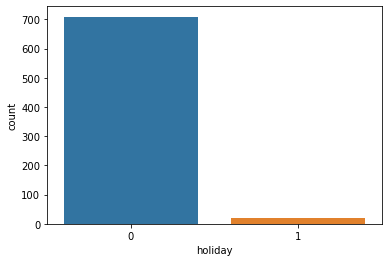

In [26]:
print(bikes.holiday.value_counts())

sns.countplot(bikes.holiday)
plt.show()

#### For Weather

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    463
2    246
3     21
Name: weathersit, dtype: int64


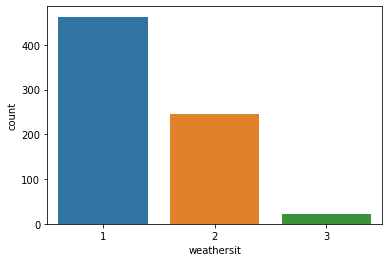

In [27]:
print(bikes.weathersit.value_counts())

sns.countplot(bikes.weathersit)
plt.show()

In [28]:
def weathers(x):
    if x == 1:
        return "Clear"
    elif x== 2:
        return "Cloudy"
    elif x == 3:
        return "Light Snow + Rain"
    else:
        return "Heavy Snow + Rain"

In [29]:
bikes["weathersit"] = bikes["weathersit"].apply(weathers)

In [30]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bikes["weathersit"].value_counts()

Clear                463
Cloudy               246
Light Snow + Rain     21
Name: weathersit, dtype: int64

1    504
0    226
Name: workingday, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


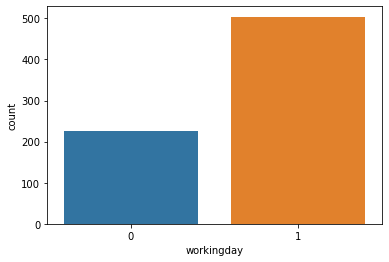

In [32]:
print(bikes.workingday.value_counts())

sns.countplot(bikes.workingday)
plt.show()

In [33]:
corr = bikes.corr()
corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

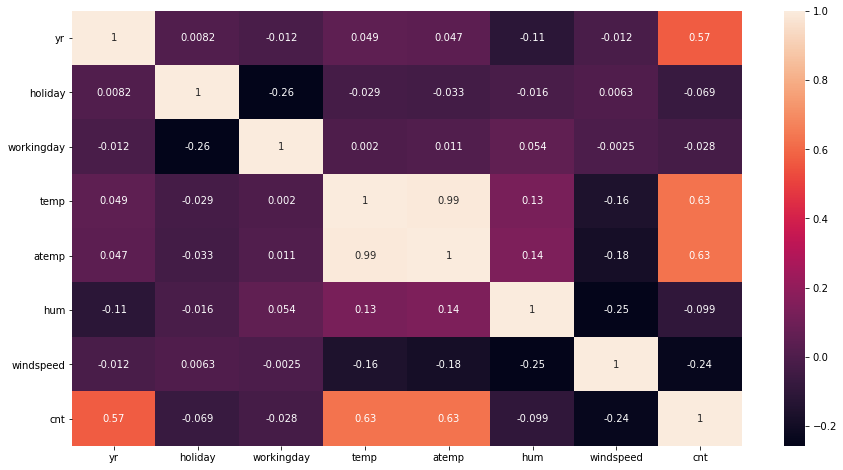

In [34]:
#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr ,annot=True)

#We can see that atemp and temp show a very high correlation (0.99) , which means either one of them can be dropped

In [35]:
bikes.drop(["atemp"], axis = 1, inplace = True)

In [36]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,43.6957,12.522300,1600


### Check Outliers and Drop

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

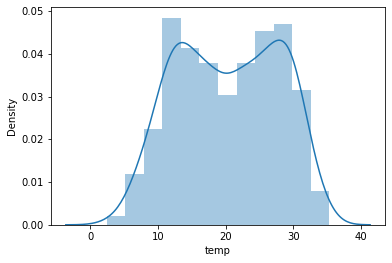

In [37]:
sns.distplot(bikes.temp)

In [38]:
bikes.temp.mean()

20.31925921698629

In [39]:
bikes.temp.std()

7.506728936951135

In [40]:
# Upper limit = mu + 3*(std.dev)
upper_limit = bikes.temp.mean() + (3*(bikes.temp.std()))
upper_limit

42.8394460278397

In [41]:
# Lower limit = mu + 3*(std.dev)
lower_limit = bikes.temp.mean() - (3*(bikes.temp.std()))
lower_limit

-2.2009275938671173

In [42]:
bikes[(bikes.temp > upper_limit) | (bikes.temp < lower_limit ) ] 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


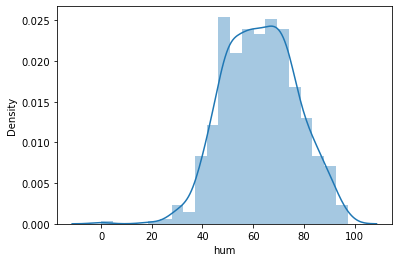

In [43]:
sns.distplot(bikes.hum)
plt.show()

In [44]:
bikes.hum.mean()

62.76517493150685

In [45]:
bikes.hum.std()

14.237589043405638

In [46]:
UL = bikes.hum.mean() + 3*(bikes.hum.std())
UL

105.47794206172377

In [47]:
LL = bikes.hum.mean() - 3*(bikes.hum.std())
LL

20.05240780128993

In [48]:
bikes[(bikes.hum > UL) | (bikes.hum < LL)] 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
49,spring,0,february,0,monday,1,Clear,16.365847,18.7917,34.000021,1635
68,spring,0,march,0,saturday,0,Light Snow + Rain,15.952731,0.0000,17.545759,623


In [49]:
bikes1 = bikes[(bikes.hum < UL) & (bikes.hum > LL)]
bikes1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,43.6957,12.522300,1600


In [50]:
bikes1.shape

(728, 11)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

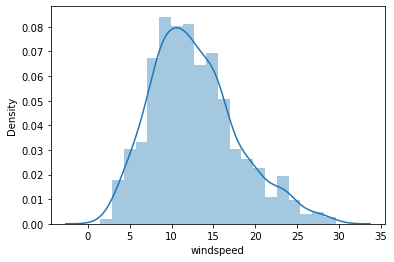

In [51]:
sns.distplot(bikes1.windspeed)

In [52]:
bikes1.windspeed.mean()

12.727879900961534

In [53]:
bikes1.windspeed.std()

5.139840207337757

In [54]:
UL1 = bikes1.windspeed.mean() + 3*(bikes1.windspeed.std())
UL1

28.147400522974806

In [55]:
LL1 = bikes1.windspeed.mean() - 3*(bikes1.windspeed.std())
LL1

-2.691640721051737

In [56]:
bikes1[(bikes1.windspeed > UL1) | (bikes1.windspeed < LL1)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
292,winter,0,octomber,0,saturday,0,Clear,19.509153,63.6250,28.292425,4195
420,spring,1,february,0,monday,1,Clear,11.924153,39.5833,28.250014,2732
431,spring,1,march,0,friday,1,Clear,21.627500,56.7500,29.584721,5382


In [57]:
bikes2 = bikes1[(bikes1.windspeed < UL1) & (bikes1.windspeed > LL1)]
bikes2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,43.6957,12.522300,1600


In [58]:
bikes2.shape

(725, 11)

### Lets create dummy veriables for [season,mnth,weekday,weathersit]

In [59]:
#season_dummy = pd.get_dummies(bikes.season ,drop_first=True)

In [60]:
#season_dummy.head()

In [61]:
#bikes = pd.concat([bikes ,season_dummy],axis=1 )
#bikes.head()

In [62]:
#bikes.shape

In [63]:
bikes2 = pd.get_dummies(bikes2 , columns=["season","mnth","weekday","weathersit"],drop_first=True)
bikes2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octomber,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,weathersit_Light Snow + Rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data into train and test sets

### Rescaling the features.

We will use the MinMaxScaler function

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

#### Apply the scaler function to the columns which does not have a dummy variable or binary value

In [66]:
col = ["temp","hum","windspeed","cnt"]

In [67]:
bikes2[col] = scaler.fit_transform(bikes2[col])

In [68]:
bikes2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octomber,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,weathersit_Light Snow + Rain
0,0,0,1,0.355170,0.767981,0.349048,0.110792,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.615202,0.571777,0.089623,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0.171000,0.254904,0.571196,0.152669,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.175530,0.468123,0.348669,0.177174,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.254464,0.415933,0.181546,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
bikes2.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octomber,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,weathersit_Light Snow + Rain
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,...,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,0.500690,0.028966,0.691034,0.544532,0.522526,0.421195,0.517373,0.242759,0.253793,0.244138,...,0.084138,0.082759,0.142069,0.140690,0.143448,0.143448,0.144828,0.143448,0.339310,0.027586
std,0.500345,0.167825,0.462386,0.228626,0.194482,0.190422,0.222377,0.429046,0.435481,0.429871,...,0.277786,0.275707,0.349362,0.347941,0.350771,0.350771,0.352170,0.350771,0.473802,0.163897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345824,0.372969,0.283049,0.364933,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.519721,0.397802,0.521284,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.662993,0.531468,0.686148,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


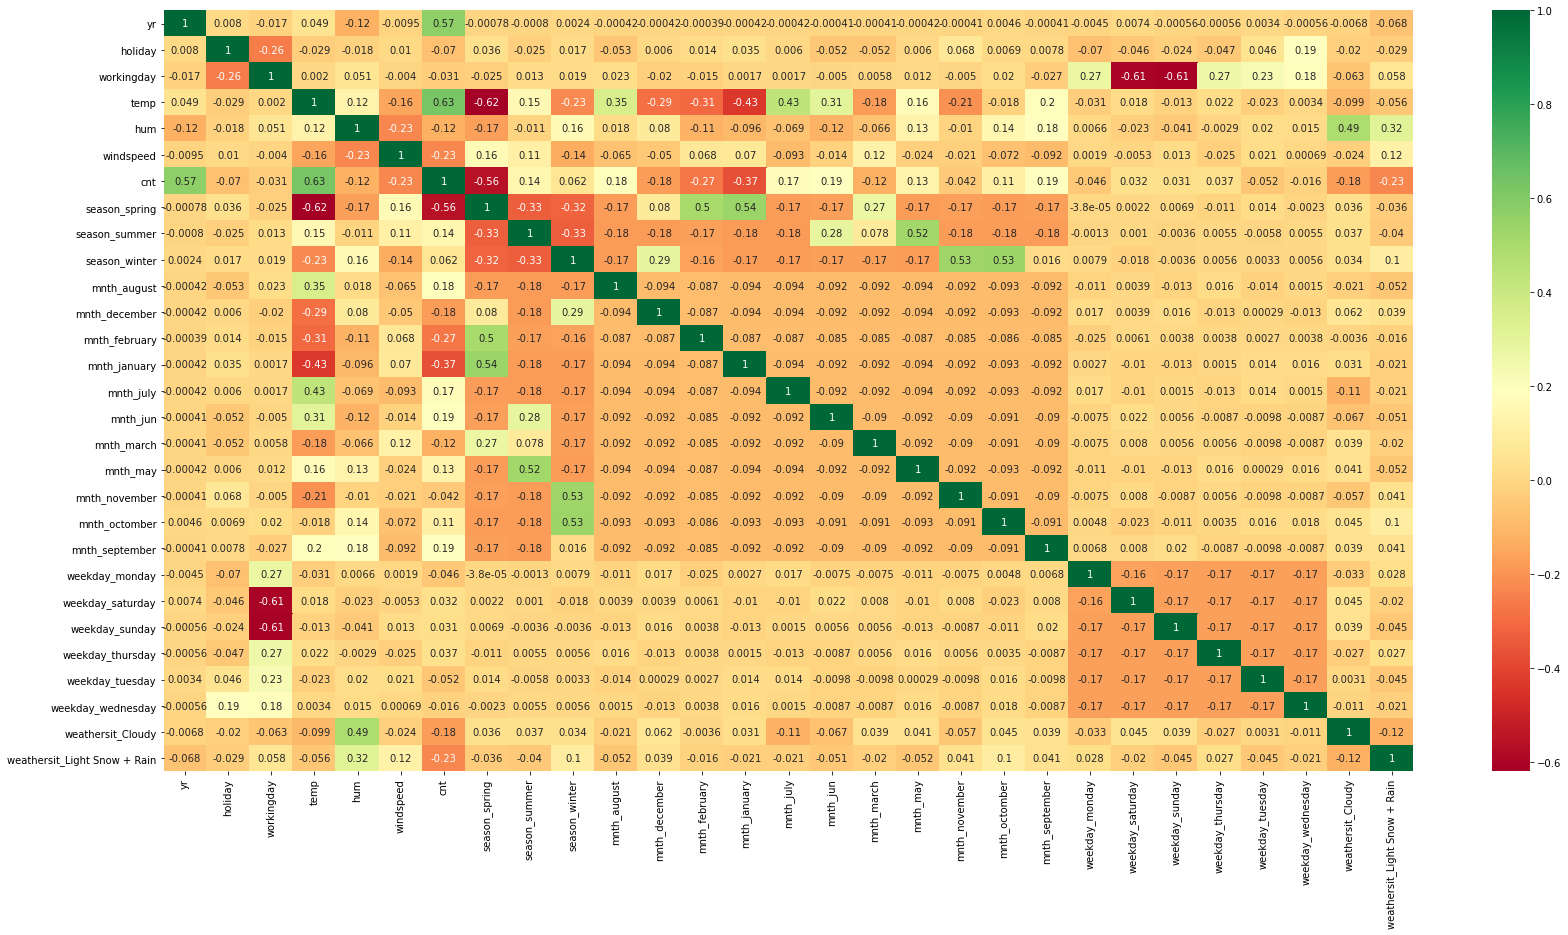

In [70]:
plt.figure(figsize=(28,14))
sns.heatmap(bikes2.corr() ,annot= True ,cmap="RdYlGn")
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

### Split into train and test

In [72]:
df_train ,df_test = train_test_split(bikes2 ,test_size=0.2 , random_state=50)

### Split Data into X and Y for model building

In [74]:
y = df_train.loc[:,"cnt"]

In [77]:
y

641    0.840543
42     0.166820
547    0.713875
358    0.084215
469    0.817994
         ...   
134    0.521284
291    0.276346
111    0.191095
485    0.657846
693    0.276346
Name: cnt, Length: 580, dtype: float64

In [ ]:
#y_train = bikes2.pop('cnt')
#y_train

In [78]:
x =df_train.drop('cnt' ,axis= 1)

In [79]:
x.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_august,...,mnth_octomber,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,weathersit_Light Snow + Rain
641,1,0,1,0.745598,0.652553,0.240582,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
42,0,0,1,0.203567,0.403712,0.457567,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
547,1,0,1,0.900316,0.268561,0.437088,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
358,0,0,1,0.268714,0.594623,0.335509,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
469,1,0,1,0.682257,0.353248,0.512589,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### RFE = Recurssive Features Elimination

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [82]:
rfe = RFE(model,15)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [83]:
fit = rfe.fit(x,y)

In [84]:
# Num of Features
fit.n_features_

15

In [85]:
#Selected Festures
fit.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [86]:
#Feature ranking
fit.ranking_

array([ 1,  1,  4,  1,  1,  1,  1,  7,  1, 12,  1,  8,  2,  1, 14,  1,  1,
        1,  3,  1, 10,  6,  9, 13,  5, 11,  1,  1])

In [87]:
list(zip(x.columns ,fit.support_,fit.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_august', False, 12),
 ('mnth_december', True, 1),
 ('mnth_february', False, 8),
 ('mnth_january', False, 2),
 ('mnth_july', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_march', True, 1),
 ('mnth_may', True, 1),
 ('mnth_november', True, 1),
 ('mnth_octomber', False, 3),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 10),
 ('weekday_saturday', False, 6),
 ('weekday_sunday', False, 9),
 ('weekday_thursday', False, 13),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow + Rain', True, 1)]

#Select the column with true values

In [88]:
col_1 = x.columns[fit.support_]
col_1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_december', 'mnth_july', 'mnth_march', 'mnth_may',
       'mnth_november', 'mnth_september', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain'],
      dtype='object')

In [89]:
x_train_rfe = x[col_1]

In [90]:
import statsmodels.formula.api as smf

In [91]:
import statsmodels.api as sm

In [92]:
#Add Constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [93]:
model = sm.OLS(y , x_train_rfe).fit()

In [94]:
model.params

const                           0.327706
yr                              0.231166
holiday                        -0.073236
temp                            0.450157
hum                            -0.162661
windspeed                      -0.136989
season_spring                  -0.116574
season_winter                   0.093229
mnth_december                  -0.050333
mnth_july                      -0.048482
mnth_march                      0.039492
mnth_may                        0.047583
mnth_november                  -0.062456
mnth_september                  0.072471
weathersit_Cloudy              -0.039192
weathersit_Light Snow + Rain   -0.155292
dtype: float64

In [95]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          4.88e-223
Time:                        22:33:01   Log-Likelihood:                 605.61
No. Observations:                 580   AIC:                            -1179.
Df Residuals:                     564   BIC:                            -1109.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## VIF


### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
#Import the VIF module from statsmodels

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
x_train_rfe =x_train_rfe.drop("const" ,axis = 1)

In [98]:
x_train_rfe

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_december,mnth_july,mnth_march,mnth_may,mnth_november,mnth_september,weathersit_Cloudy,weathersit_Light Snow + Rain
641,1,0,0.745598,0.652553,0.240582,0,1,0,0,0,0,0,0,1,0
42,0,0,0.203567,0.403712,0.457567,1,0,0,0,0,0,0,0,0,0
547,1,0,0.900316,0.268561,0.437088,0,0,0,1,0,0,0,0,0,0
358,0,0,0.268714,0.594623,0.335509,1,0,1,0,0,0,0,0,0,0
469,1,0,0.682257,0.353248,0.512589,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0.627223,0.853248,0.330169,0,0,0,0,0,1,0,0,1,0
291,0,0,0.601354,0.892413,0.558630,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.661832,0.498410,0,0,0,0,0,0,0,0,1,0
485,1,0,0.690564,0.564384,0.338050,0,0,0,0,0,1,0,0,1,0


In [99]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF_Values"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF_Values'] = round(vif['VIF_Values'], 2)
vif = vif.sort_values(by = "VIF_Values", ascending = False)
vif

,Features,VIF_Values
3,hum,15.04
2,temp,12.45
4,windspeed,5.25
6,season_winter,2.86
13,weathersit_Cloudy,2.51
5,season_spring,2.46
0,yr,2.00
11,mnth_november,1.86
7,mnth_december,1.48
8,mnth_july,1.46


In [ ]:
# x_train_rfe.shape[1]

In [ ]:
# x_train_rfe.values

#If VIf >= 10 ,we drop those column

In [100]:
x_train_rfe.drop("hum" ,axis = 1 ,inplace = True)

In [101]:
x_train_rfe

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_december,mnth_july,mnth_march,mnth_may,mnth_november,mnth_september,weathersit_Cloudy,weathersit_Light Snow + Rain
641,1,0,0.745598,0.240582,0,1,0,0,0,0,0,0,1,0
42,0,0,0.203567,0.457567,1,0,0,0,0,0,0,0,0,0
547,1,0,0.900316,0.437088,0,0,0,1,0,0,0,0,0,0
358,0,0,0.268714,0.335509,1,0,1,0,0,0,0,0,0,0
469,1,0,0.682257,0.512589,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0.627223,0.330169,0,0,0,0,0,1,0,0,1,0
291,0,0,0.601354,0.558630,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.498410,0,0,0,0,0,0,0,0,1,0
485,1,0,0.690564,0.338050,0,0,0,0,0,1,0,0,1,0


In [103]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [104]:
x_train_rfe.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_december,mnth_july,mnth_march,mnth_may,mnth_november,mnth_september,weathersit_Cloudy,weathersit_Light Snow + Rain
641,1.0,1,0,0.745598,0.240582,0,1,0,0,0,0,0,0,1,0
42,1.0,0,0,0.203567,0.457567,1,0,0,0,0,0,0,0,0,0
547,1.0,1,0,0.900316,0.437088,0,0,0,1,0,0,0,0,0,0
358,1.0,0,0,0.268714,0.335509,1,0,1,0,0,0,0,0,0,0
469,1.0,1,0,0.682257,0.512589,0,0,0,0,0,0,0,0,0,0


In [105]:
model2 = sm.OLS(y ,x_train_rfe).fit()

In [106]:
model2.params

const                           0.267188
yr                              0.237791
holiday                        -0.076661
temp                            0.411809
windspeed                      -0.098785
season_spring                  -0.125222
season_winter                   0.081529
mnth_december                  -0.058626
mnth_july                      -0.044808
mnth_march                      0.036979
mnth_may                        0.029991
mnth_november                  -0.064800
mnth_september                  0.060264
weathersit_Cloudy              -0.075854
weathersit_Light Snow + Rain   -0.231836
dtype: float64

In [107]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     217.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          8.20e-217
Time:                        22:34:09   Log-Likelihood:                 588.01
No. Observations:                 580   AIC:                            -1146.
Df Residuals:                     565   BIC:                            -1081.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2672      0.024     11.322      0.000       0.221       0.314
yr                               0.2378      0.007     31.852      0.000       0.223       0.252
holiday                         -0.0767      0.022     -3.463      0.001      -0.120      -0.033
temp                             0.4118      0.029     14.142      0.000       0.355       0.469
windspeed                       -0.0988      0.020     -4.910      0.000      -0.138      -0.059
season_spring                   -0.1252      0.015     -8.566      0.000      -0.154      -0.097
season_winter                    0.0815      0.013      6.096      0.000       0.055       0.108
mnth_december                   -0.0586      0.015     -3.842      0.000      -0.089      -0.029
mnth_july                       -0.0448      0.016     -2.851      0.005      -0.076      -0.014
mnth_march                       0.0370      0.014      2.610      0.009       0.009       0.065
mnth_may                         0.0300      0.014      2.143      0.033       0.003       0.057
mnth_november                   -0.0648      0.017     -3.766      0.000      -0.099      -0.031
mnth_september                   0.0603      0.015      4.119      0.000       0.032       0.089
weathersit_Cloudy               -0.0759      0.008     -9.394      0.000      -0.092      -0.060
weathersit_Light Snow + Rain    -0.2318      0.024     -9.749      0.000      -0.279      -0.185
==============================================================================
Omnibus:                       84.627   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.827
Skew:                          -0.712   Prob(JB):                     5.07e-53
Kurtosis:                       5.817   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# model predict
y_train_pred = model2.predict(x_train_rfe)
y_train_pred

641    0.793931
42     0.180595
547    0.787750
358    0.160854
469    0.735302
         ...   
134    0.447005
291    0.309339
111    0.284512
485    0.710101
693    0.585514
Length: 580, dtype: float64

### Residual Analysis of the train data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


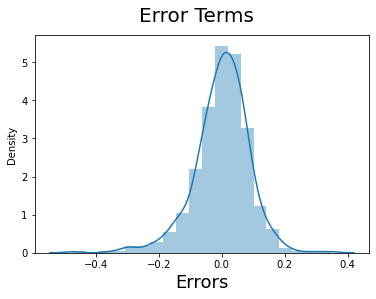

In [109]:
# Plot graphs for error term
fig = plt.figure()
sns.distplot((y - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [110]:
y_test = df_test.loc[:,"cnt"]

In [111]:
x_test = df_test.drop("cnt" ,axis=1)

In [114]:
x_test

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_august,...,mnth_octomber,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,weathersit_Light Snow + Rain
16,0,1,0,0.145417,0.394431,0.433927,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
607,1,0,0,0.878510,0.464037,0.369495,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
79,0,0,1,0.462664,0.672702,0.673528,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
408,1,0,1,0.203567,0.218677,0.366335,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
554,1,0,1,0.812053,0.597447,0.400953,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,0,0,0.801670,0.502320,0.125795,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
203,0,0,1,0.984424,0.342227,0.275158,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
530,1,0,0,0.722754,0.466937,0.389934,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
102,0,0,1,0.440316,0.786543,0.577031,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [113]:
x_test.shape

(145, 28)

In [128]:
x_test = x_test[x.columns[fit.support_]]

In [129]:
x_test.shape

(145, 15)

In [130]:
y_test_pred = model2.predict(x_test)

In [131]:
y_test_pred

16     0.145131
607    0.354434
79     0.136147
408    0.180224
554    0.290698
         ...   
600    0.324310
203   -0.006525
530    0.365549
102    0.157294
329    0.220059
Length: 145, dtype: float64

## Following is the best fit equation

cnt = 0.23779 x yr - 0.07666 x holiday +  0.411809 x temp - 0.09878 x windspeed - 0.12522 x season_spring  + 0.08152 x season_winter -0.058626 x mnth_december - 0.044808 x mnth_july + 0.036979 x mnth_march + 0.029991 x mnth_may -0.064800 x mnth_november + 0.060265 x mnth_september - 0.075854 x weathersit_cloudy - 0.2318 x weathersit_light snow +  0.307549